In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./../")

In [3]:
# default libraries
import time
import datetime
import pickle
import pprint
from pathlib import Path
import math


# third party libraries
import torch
import torchvision
import torchvision.transforms as T

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from dotted_dict import DottedDict


Files

In [4]:
# path of experiments
p_data = Path('/mnt/data/experiments/EfficientCN/sem_comp')

In [5]:
# trained with marging loss generated semantic compactness
p_cnn_cr = p_data / 'semcomp_mnist_MnistCNN_CR_2022_02_03_16_27_32'
p_cnn_cr_sf = p_data / 'semcomp_mnist_MnistCNN_CR_SF_2022_02_03_16_27_48'
p_cnn_r = p_data / 'semcomp_mnist_MnistCNN_R_2022_02_04_09_41_08'
p_effcn = p_data / 'semcomp_mnist_MnistEffCapsNet_2022_02_03_17_49_52'

In [6]:
# trained without reconstruction loss generated semantic compactness
p_cnn_cr_no = p_data / 'semcomp_mnist_MnistCNN_CR_2022_02_07_11_05_35'
p_cnn_cr_sf_no = p_data / 'semcomp_mnist_MnistCNN_CR_SF_2022_02_07_11_05_17'
p_cnn_r_no = p_data / 'semcomp_mnist_MnistCNN_R_2022_02_07_11_14_17'
p_effcn_no = p_data / 'semcomp_mnist_MnistEffCapsNet_2022_02_07_11_04_29'

In [7]:
p_cnn_r

PosixPath('/mnt/data/experiments/EfficientCN/sem_comp/semcomp_mnist_MnistCNN_R_2022_02_04_09_41_08')

In [8]:
"""
stats = {
    "model": str(p_model),
    "dataset": str(p_data),
    "train": config.ds.train,
    "affine": name,
    "pca": {
        'pca_eig': pca_eig,
        'pca_mean': pca_mean,
    },
    "kld": {
        'kld_val': kl_div,
        'kld_mean': kld_mean,
    }
}  
"""

'\nstats = {\n    "model": str(p_model),\n    "dataset": str(p_data),\n    "train": config.ds.train,\n    "affine": name,\n    "pca": {\n        \'pca_eig\': pca_eig,\n        \'pca_mean\': pca_mean,\n    },\n    "kld": {\n        \'kld_val\': kl_div,\n        \'kld_mean\': kld_mean,\n    }\n}  \n'

In [9]:
def load_exp(p_exps):
    kld = []
    pca = []

    for p_exp in p_exps:

        file1 = open(p_exp / 'stats_affine_xtrans.pkl', 'rb')
        xtrans = DottedDict(pickle.load(file1))
        file1.close()

        file2 = open(p_exp / 'stats_affine_ytrans.pkl', 'rb')
        ytrans = DottedDict(pickle.load(file2))
        file2.close()

        file3 = open(p_exp / 'stats_affine_rot.pkl', 'rb')
        rot = DottedDict(pickle.load(file3))
        file3.close()

        file4 = open(p_exp / 'stats_affine_scale.pkl', 'rb')
        scale = DottedDict(pickle.load(file4))
        file4.close()

        file5 = open(p_exp / 'stats_affine_shear.pkl', 'rb')
        shear = DottedDict(pickle.load(file5))
        file5.close()

        file6 = open(p_exp / 'config.pkl', 'rb')
        config = DottedDict(pickle.load(file6))
        file6.close()


        kld_mean = [xtrans.kld.kld_mean, ytrans.kld.kld_mean, rot.kld.kld_mean, scale.kld.kld_mean, shear.kld.kld_mean]
        kld.append(kld_mean)
        pca_mean = [xtrans.pca.pca_mean.tolist(), ytrans.pca.pca_mean.tolist(), rot.pca.pca_mean.tolist(), scale.pca.pca_mean.tolist(), shear.pca.pca_mean.tolist()]
        pca.append(pca_mean)

    return kld, pca

In [10]:
p_exps = [p_cnn_r, p_cnn_cr, p_cnn_cr_sf, p_effcn]
kld, pca = load_exp(p_exps)

p_exps = [p_cnn_r_no, p_cnn_cr_no, p_cnn_cr_sf_no, p_effcn_no]
kld_no, pca_no = load_exp(p_exps)

In [11]:
#config.model
#xtrans.kld.kld_mean

#print(torch.tensor(kld))
#print('\n')
#pca_c = torch.tensor(pca[1:])
#print(pca_c)

#print(pca_c.shape)

In [15]:
def matplot(matrix, x_ticks=None, y_ticks=None, title=None):
    fig, ax = plt.subplots(figsize=[8,8])
    im = ax.imshow(matrix, cmap='copper')

    # Show all ticks and label them with the respective list entries
    if x_ticks != None:
        ax.set_xticks(np.arange(len(x_ticks)), labels=x_ticks)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
    if y_ticks != None:
        ax.set_yticks(np.arange(len(y_ticks)), labels=y_ticks)

    if title != None:
        ax.set_title(title)

    # Loop over data dimensions and create text annotations.
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="w")

    fig.tight_layout()
    plt.savefig('/home/mkoch/projects/EfficientCN/compactness/kld.png')

    plt.show()

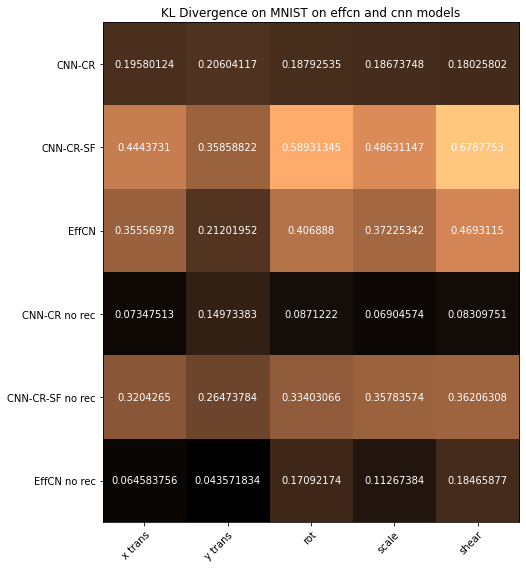

In [16]:
affines = ["x trans", "y trans", "rot", "scale","shear"]
models = ["CNN-CR", "CNN-CR-SF", "EffCN","CNN-CR no rec", "CNN-CR-SF no rec", "EffCN no rec"] # ["cnn_r", "cnn_cr", "cnn_cr_sf", "effcn"]
title = "KL Divergence on MNIST on effcn and cnn models"

a = torch.tensor(kld[1:])
b = torch.tensor(kld_no[1:])

kld_c = torch.cat((a,b), dim=0).numpy()


kld_c

matplot(kld_c, affines, models, title)


Datasets MNIST
Factors Rotation Trans-X Trans-Y Scale Shear-X Shear-Y
ConvNet-R 0.0003 0.0016 0.0009 0.0004 0.0003 0.0007
ConvNet-CR 0.0028 0.0038 0.0032 0.0052 0.0058 0.0022
ConvNet-CR-SF 0.0325 0.2010 0.3192 0.0146 0.0476 0.0506
CapsNet 0.0031 0.0107 0.0464 0.0026 0.0098 0.0021

In [17]:
kld_ref = np.array([[0.0003, 0.0016, 0.0009, 0.0004, 0.0003, 0.0007],
                    [0.0028, 0.0038, 0.0032, 0.0052, 0.0058, 0.0022],
                    [0.0325, 0.2010, 0.3192, 0.0146, 0.0476, 0.0506],
                    [0.0031, 0.0107, 0.0464, 0.0026, 0.0098, 0.0021]]) 


r = np.zeros(kld_ref.shape)
kld_r = torch.tensor(kld).numpy()
r[:,:5] = kld_r
r[:,5] = kld_r[:,4]

t = r / kld_ref 

print(t)


[[-651.48810546  -50.62228534 -197.59595394 -638.74386251 -412.66801457
  -176.85772053]
 [  69.92901542   54.22136109   58.72667301   35.91105342   31.0789691
    81.93546398]
 [  13.67301849    1.78402099    1.84622007   33.30900449   14.25998552
    13.41453183]
 [ 114.69992899   19.81490823    8.76913811  143.17439153   47.88892914
   223.48166931]]


In [18]:
a = torch.tensor(pca[1:])
b = torch.tensor(pca_no[1:])

pca_c = torch.cat((a,b), dim=0).numpy()

#print(a.shape)
#pca_c.shape

print(a-b)

tensor([[[-0.1497,  0.0744,  0.0092,  0.0055,  0.0058,  0.0061,  0.0060,
           0.0058,  0.0050,  0.0041,  0.0038,  0.0041,  0.0046,  0.0050,
           0.0051,  0.0051],
         [-0.0930,  0.0344,  0.0011,  0.0032,  0.0044,  0.0050,  0.0053,
           0.0052,  0.0047,  0.0041,  0.0037,  0.0038,  0.0043,  0.0046,
           0.0047,  0.0047],
         [-0.0738,  0.0205, -0.0045, -0.0010,  0.0011,  0.0028,  0.0037,
           0.0044,  0.0045,  0.0048,  0.0051,  0.0057,  0.0063,  0.0067,
           0.0068,  0.0069],
         [-0.0720,  0.0114,  0.0036,  0.0037,  0.0039,  0.0042,  0.0044,
           0.0047,  0.0047,  0.0042,  0.0040,  0.0041,  0.0045,  0.0048,
           0.0049,  0.0050],
         [-0.0716,  0.0043, -0.0017,  0.0012,  0.0031,  0.0044,  0.0052,
           0.0055,  0.0054,  0.0052,  0.0054,  0.0059,  0.0065,  0.0069,
           0.0071,  0.0071]],

        [[-0.0346, -0.0131, -0.0020,  0.0025,  0.0052,  0.0062,  0.0056,
           0.0045,  0.0032,  0.0029,  0.0027,  0.0

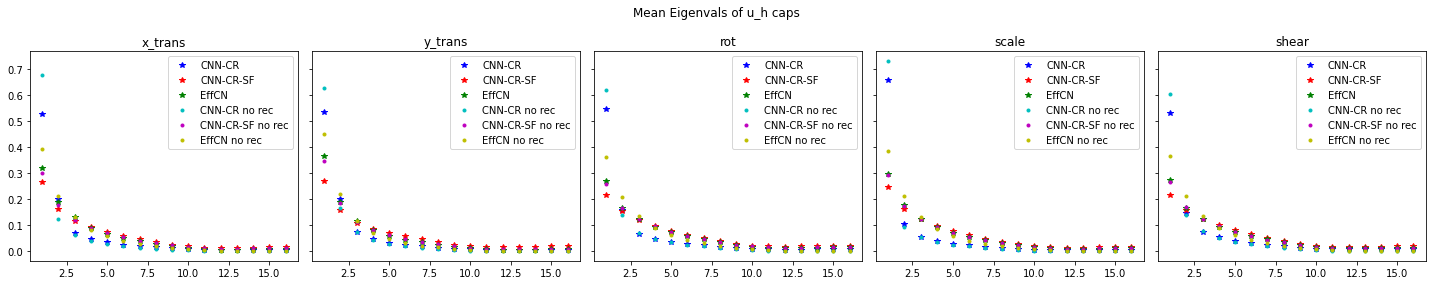

In [19]:
affines = ["x_trans", "y_trans", "rot", "scale","shear"]
models = ["CNN-CR", "CNN-CR-SF", "EffCN","CNN-CR no rec", "CNN-CR-SF no rec", "EffCN no rec"] #["cnn_r", "cnn_cr", "cnn_cr_sf", "effcn"]
title = 'Mean Eigenvals of u_h caps'

a = torch.tensor(pca[1:])
b = torch.tensor(pca_no[1:])
pca_c = torch.cat((a,b), dim=0).numpy()
x = torch.arange(1,pca_c.shape[2]+1,1)


fig, ax = plt.subplots(1,pca_c.shape[1], figsize=[20,4], sharey=True)

id = 0
aff = 0
ax[id].plot(x, pca_c[0,aff], 'b*',label=models[0])
ax[id].plot(x, pca_c[1,aff], 'r*',label=models[1])
ax[id].plot(x, pca_c[2,aff], 'g*',label=models[2])
ax[id].plot(x, pca_c[3,aff], 'c.',label=models[3])
ax[id].plot(x, pca_c[4,aff], 'm.',label=models[4])
ax[id].plot(x, pca_c[5,aff], 'y.',label=models[5])
ax[id].set_title(affines[0])
ax[id].legend()
id += 1
aff += 1
ax[id].plot(x, pca_c[0,aff], 'b*',label=models[0])
ax[id].plot(x, pca_c[1,aff], 'r*',label=models[1])
ax[id].plot(x, pca_c[2,aff], 'g*',label=models[2])
ax[id].plot(x, pca_c[3,aff], 'c.',label=models[3])
ax[id].plot(x, pca_c[4,aff], 'm.',label=models[4])
ax[id].plot(x, pca_c[5,aff], 'y.',label=models[5])
ax[id].set_title(affines[1])
ax[id].legend()
id += 1
aff += 1
ax[id].plot(x, pca_c[0,aff], 'b*',label=models[0])
ax[id].plot(x, pca_c[1,aff], 'r*',label=models[1])
ax[id].plot(x, pca_c[2,aff], 'g*',label=models[2])
ax[id].plot(x, pca_c[3,aff], 'c.',label=models[3])
ax[id].plot(x, pca_c[4,aff], 'm.',label=models[4])
ax[id].plot(x, pca_c[5,aff], 'y.',label=models[5])
ax[id].set_title(affines[2])
ax[id].legend()
id += 1
aff += 1
ax[id].plot(x, pca_c[0,aff], 'b*',label=models[0])
ax[id].plot(x, pca_c[1,aff], 'r*',label=models[1])
ax[id].plot(x, pca_c[2,aff], 'g*',label=models[2])
ax[id].plot(x, pca_c[3,aff], 'c.',label=models[3])
ax[id].plot(x, pca_c[4,aff], 'm.',label=models[4])
ax[id].plot(x, pca_c[5,aff], 'y.',label=models[5])
ax[id].set_title(affines[3])
ax[id].legend()
id += 1
aff += 1
ax[id].plot(x, pca_c[0,aff], 'b*',label=models[0])
ax[id].plot(x, pca_c[1,aff], 'r*',label=models[1])
ax[id].plot(x, pca_c[2,aff], 'g*',label=models[2])
ax[id].plot(x, pca_c[3,aff], 'c.',label=models[3])
ax[id].plot(x, pca_c[4,aff], 'm.',label=models[4])
ax[id].plot(x, pca_c[5,aff], 'y.',label=models[5])
ax[id].set_title(affines[4])
ax[id].legend()


fig.suptitle('Mean Eigenvals of u_h caps')
fig.tight_layout()
plt.savefig('/home/mkoch/projects/EfficientCN/compactness/pca.png')
plt.show()